In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
base = [
    {"Dia": 1, "Tempo": "Sol", "Temperatura": "Quente", "Umidade": "Alta", "Vento": "Fraco"},
    {"Dia": 2, "Tempo": "Sol", "Temperatura": "Quente", "Umidade": "Alta", "Vento": "Forte"},
    {"Dia": 3, "Tempo": "Nublado", "Temperatura": "Quente", "Umidade": "Alta", "Vento": "Fraco"},
    {"Dia": 4, "Tempo": "Chuva", "Temperatura": "Mediana", "Umidade": "Alta", "Vento": "Fraco"},
    {"Dia": 5, "Tempo": "Chuva", "Temperatura": "Frio", "Umidade": "Normal", "Vento": "Fraco"},
    {"Dia": 6, "Tempo": "Chuva", "Temperatura": "Frio", "Umidade": "Normal", "Vento": "Forte"},
    {"Dia": 7, "Tempo": "Nublado", "Temperatura": "Frio", "Umidade": "Normal", "Vento": "Forte"},
    {"Dia": 8, "Tempo": "Sol", "Temperatura": "Mediana", "Umidade": "Alta", "Vento": "Fraco"},
    {"Dia": 9, "Tempo": "Sol", "Temperatura": "Frio", "Umidade": "Normal", "Vento": "Fraco"},
    {"Dia": 10, "Tempo": "Chuva", "Temperatura": "Mediana", "Umidade": "Normal", "Vento": "Fraco"},
    {"Dia": 11, "Tempo": "Sol", "Temperatura": "Mediana", "Umidade": "Normal", "Vento": "Forte"},
    {"Dia": 12, "Tempo": "Nublado", "Temperatura": "Mediana", "Umidade": "Alta", "Vento": "Forte"},
    {"Dia": 13, "Tempo": "Nublado", "Temperatura": "Quente", "Umidade": "Normal", "Vento": "Fraco"},
    {"Dia": 14, "Tempo": "Chuva", "Temperatura": "Mediana", "Umidade": "Alta", "Vento": "Forte"},
]

In [7]:
df = pd.DataFrame(base)
df.head()

,Dia,Tempo,Temperatura,Umidade,Vento
0,1,Sol,Quente,Alta,Fraco
1,2,Sol,Quente,Alta,Forte
2,3,Nublado,Quente,Alta,Fraco
3,4,Chuva,Mediana,Alta,Fraco
4,5,Chuva,Frio,Normal,Fraco


In [10]:
#precisamos transformar esses dados em dados numéricos.

# Transformar os dados categóricos em numéricos
encoder = LabelEncoder()
for column in ["Tempo", "Temperatura", "Umidade", "Vento"]:
    df[column] = encoder.fit_transform(df[column])    

In [11]:
# Normalizar os dados para melhorar o desempenho do k-means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("Dia", axis=1))

In [21]:
#df.head(14)
print(df_scaled)

[[ 1.18321596  1.32287566 -1.          0.8660254 ]
 [ 1.18321596  1.32287566 -1.         -1.15470054]
 [ 0.          1.32287566 -1.          0.8660254 ]
 [-1.18321596  0.         -1.          0.8660254 ]
 [-1.18321596 -1.32287566  1.          0.8660254 ]
 [-1.18321596 -1.32287566  1.         -1.15470054]
 [ 0.         -1.32287566  1.         -1.15470054]
 [ 1.18321596  0.         -1.          0.8660254 ]
 [ 1.18321596 -1.32287566  1.          0.8660254 ]
 [-1.18321596  0.          1.          0.8660254 ]
 [ 1.18321596  0.          1.         -1.15470054]
 [ 0.          0.         -1.         -1.15470054]
 [ 0.          1.32287566  1.          0.8660254 ]
 [-1.18321596  0.         -1.         -1.15470054]]


In [26]:
#Aplicando o algoritmo

# Para k=2
kmeans_2 = KMeans(n_clusters=2, n_init = 10, random_state=42)
clusters_2 = kmeans_2.fit_predict(df_scaled)

# Para k=3
kmeans_3 = KMeans(n_clusters=3, n_init = 10, random_state=42)
clusters_3 = kmeans_3.fit_predict(df_scaled)

C:\Users\super\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\super\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Avaliação para k=2
silhouette_k2 = silhouette_score(df_scaled, clusters_2)
calinski_k2 = calinski_harabasz_score(df_scaled, clusters_2)

# Avaliação para k=3
silhouette_k3 = silhouette_score(df_scaled, clusters_3)
calinski_k3 = calinski_harabasz_score(df_scaled, clusters_3)

# Exibir resultados
print(f"K=2 -> Silhouette Score: {silhouette_k2:.3f}, Calinski-Harabasz: {calinski_k2:.3f}")
print(f"K=3 -> Silhouette Score: {silhouette_k3:.3f}, Calinski-Harabasz: {calinski_k3:.3f}")

K=2 -> Silhouette Score: 0.249, Calinski-Harabasz: 6.308
K=3 -> Silhouette Score: 0.217, Calinski-Harabasz: 5.437


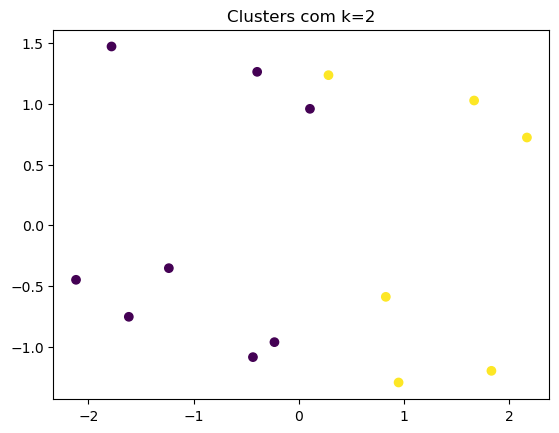

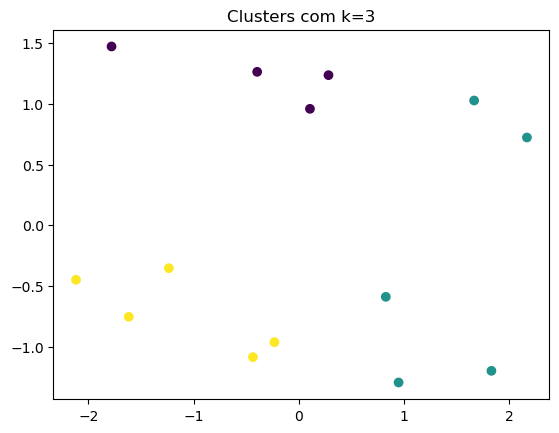

In [19]:
# Reduzir para 2 dimensões com PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plotar para k=2
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_2, cmap='viridis', label='k=2')
plt.title('Clusters com k=2')
plt.show()

# Plotar para k=3
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_3, cmap='viridis', label='k=3')
plt.title('Clusters com k=3')
plt.show()